# Plot Scope Data
Find pulse height, plot histogram of pulse heights

In [8]:
import numpy as np # math/general purpose
import matplotlib.pyplot as plt # plotting
import os # file/directory access
from tqdm import tqdm # progress bar

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 18

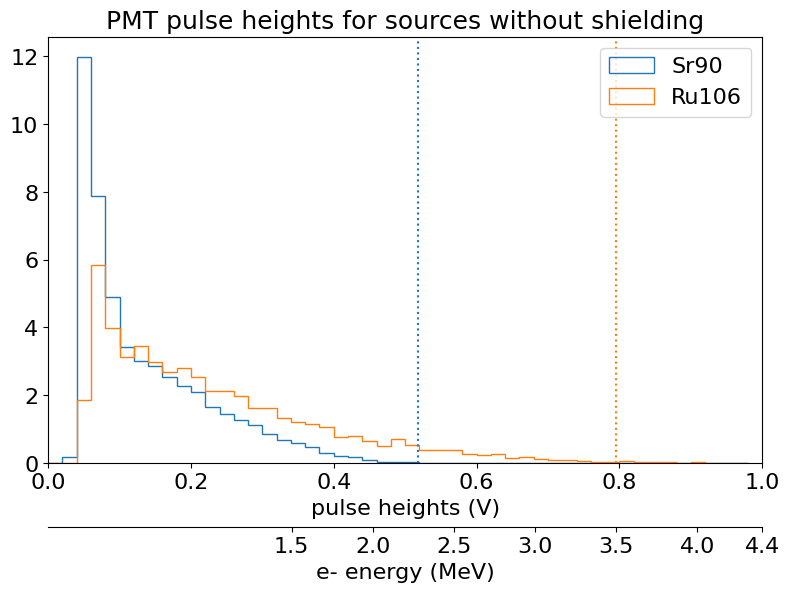

In [10]:
filepath = "./data/24-03-14_run-003_Sr90_Vthres-20mV_Ntrace-10000.npy"
data = np.load(filepath)
pulseheights1 = [np.max(d[0]) for d in data]
filepath = "./data/24-03-14_run-004_Ru106_Vthres-20mV_Ntrace-10000.npy"
data = np.load(filepath)
pulseheights2 = [np.max(d[0]) for d in data]
fig, ax1 = plt.subplots()

plt.hist(pulseheights1, histtype='step', bins=np.arange(0,1,0.02), label="Sr90", density=True)
plt.hist(pulseheights2, histtype='step', bins=np.arange(0,1,0.02), label="Ru106", density=True)
ax1.axvline(2.28/4.4, linestyle=":", c='tab:blue')
ax1.axvline(3.5/4.4, linestyle=":", c='tab:orange')
plt.xlabel('pulse heights (V)')
plt.xlim(0,1)
plt.title('PMT pulse heights for sources without shielding')
plt.legend()



# make second axis
ax2 = ax1.twiny()
fig.subplots_adjust(bottom=0.2)
tick_loc = np.array([1.5, 2, 2.5, 3, 3.5, 4, 4.4])

def tick_function(X):
    return X/4.4

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(tick_function(tick_loc))
ax2.set_xticklabels(["%.1f"%z for z in tick_loc])
ax2.set_xlabel("e- energy (MeV)")




plt.tight_layout()
plt.show()
fig.savefig('./fig/Sr90_Ru106_naturalspectrum.png')

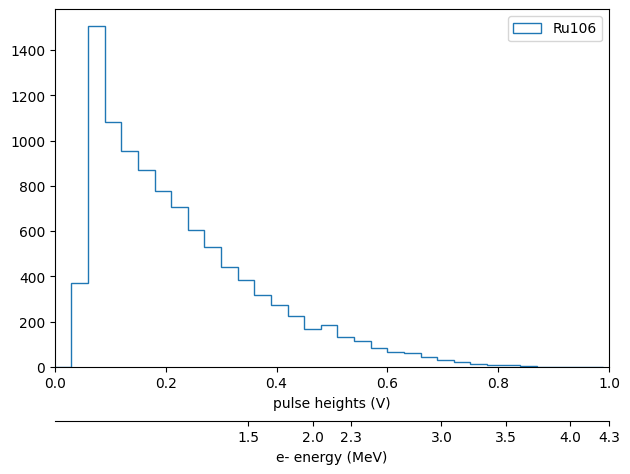

In [6]:
filepath = "./data/24-03-14_run-003_Sr90_Vthres-20mV_Ntrace-10000.npy"
data = np.load(filepath)
pulseheights1 = [np.max(d) for d in data]
filepath = "./data/24-03-14_run-004_Ru106_Vthres-20mV_Ntrace-10000.npy"
data = np.load(filepath)
pulseheights2 = [np.max(d[0]) for d in data]
fig, ax1 = plt.subplots()

#plt.hist(pulseheights1, histtype='step', bins=np.arange(0,1,0.02), label="Sr90")
plt.hist(pulseheights2, histtype='step', bins=np.arange(0,1,0.03), label="Ru106")
plt.xlabel('pulse heights (V)')
plt.xlim(0,1)
plt.legend()



# make second axis
ax2 = ax1.twiny()
fig.subplots_adjust(bottom=0.2)
tick_loc = np.array([1.5, 2, 2.3, 3, 3.5, 4, 4.3])

def tick_function(X):
    V = X/4.3
    return V

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

# as @ali14 pointed out, for python3, use this
# for sp in ax2.spines.values():
# and for python2, use this
for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(tick_function(tick_loc))
ax2.set_xticklabels(["%.1f"%z for z in tick_loc])
ax2.set_xlabel("e- energy (MeV)")


plt.tight_layout()
plt.show()
fig.savefig('./fig/Ru106_naturalspectrum.png')

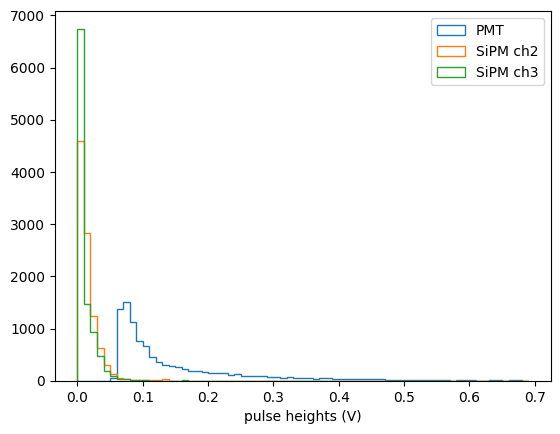

In [26]:
# Plot one
filepath = "./data/24-03-14_run-011_2SiPMs_Vthres-40mV_Ntrace-10000.npy"
data = np.load(filepath)
pulseheights1 = [np.max(d[0]) for d in data]
pulseheights2 = [np.max(d[1]) for d in data]
pulseheights3 = [np.max(d[2]) for d in data]
plt.figure()
plt.hist(pulseheights1, histtype='step', bins=np.arange(0,0.7,0.01), label="PMT")
plt.hist(np.array(pulseheights2)-0.045, histtype='step', bins=np.arange(0,0.7,0.01), label="SiPM ch2")
plt.hist(pulseheights3, histtype='step', bins=np.arange(0,0.7,0.01), label="SiPM ch3")
plt.xlabel('pulse heights (V)')
plt.legend()
plt.show().

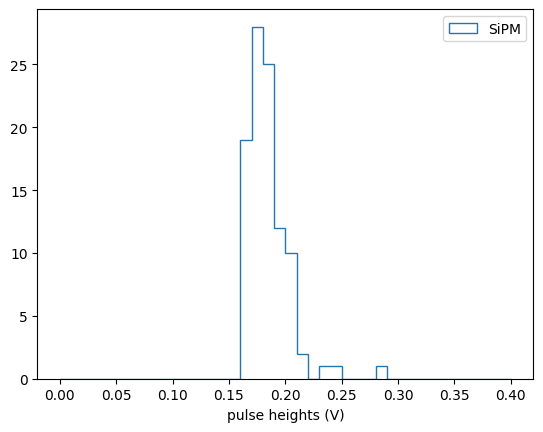

99

In [21]:
filepath = "./data/24-03-14_run-002_sipm_muonrate_Vthres-150mV_Ntrace-100.npy"
data = np.load(filepath)
#pulseheights1 = [np.max(d[0]) for d in data]
pulseheights2 = [np.max(d[1]) for d in data]
plt.figure()
#plt.hist(pulseheights1, histtype='step', bins=np.arange(0,0.41,0.01), label="PMT")
plt.hist(pulseheights2, histtype='step', bins=np.arange(0,0.41,0.01), label="SiPM")
plt.xlabel('pulse heights (V)')
plt.legend()
plt.show()
np.count_nonzero(np.array(pulseheights2) > 0.1)

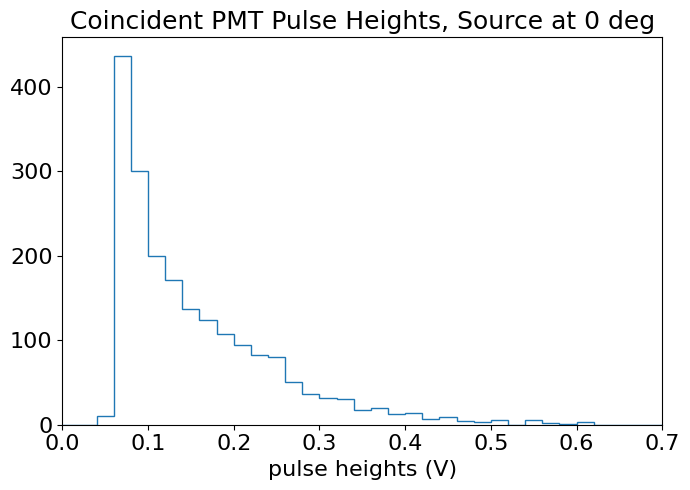

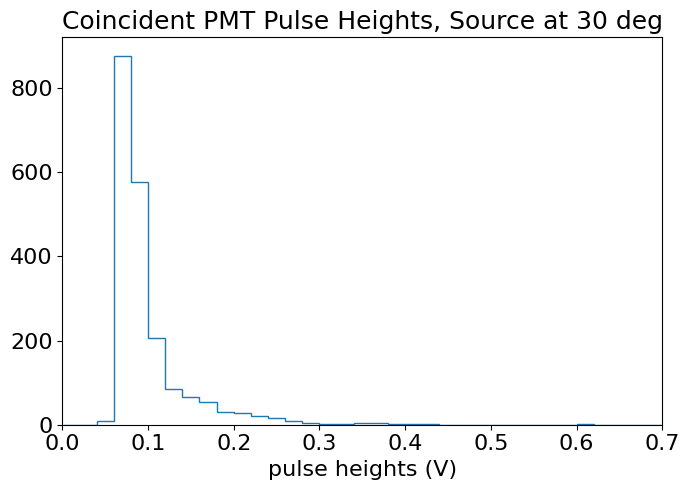

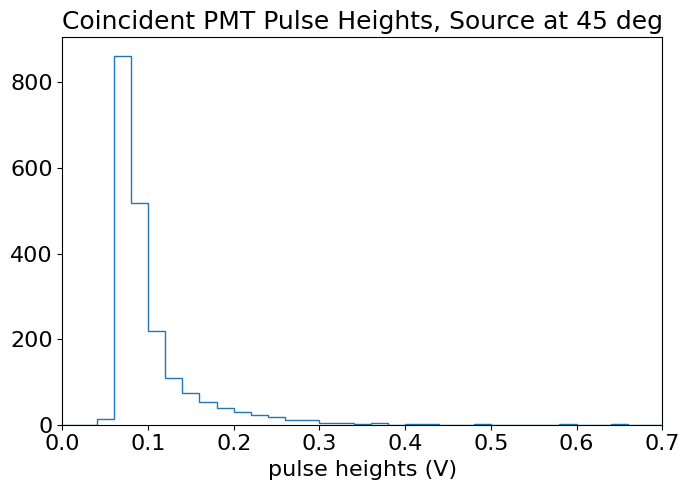

In [16]:
def plot(filepath, title):
    data = np.load(filepath)
    pulseheights = [np.max(d[0]) for d in data]
    fig, ax = plt.subplots(figsize=(7,5))
    h = plt.hist(pulseheights, histtype='step', bins=np.arange(0,1,0.02), label="PMT")
    plt.xlabel('pulse heights (V)')
    plt.xlim(0, 0.7)
    plt.title(title)
    plt.tight_layout()
    fig.savefig('./fig2/'+filepath.split('/')[-1].replace('.npy', '.png'))

plot('./data/24-03-17_run-010_Ru106_collimation_0deg_Vthres-40mV_Ntrace-2000.npy', 'Coincident PMT Pulse Heights, Source at 0 deg')
plot('./data/24-03-17_run-011_Ru106_collimation_30deg_Vthres-40mV_Ntrace-2000.npy', 'Coincident PMT Pulse Heights, Source at 30 deg')
plot('./data/24-03-17_run-012_Ru106_collimation_45deg_Vthres-40mV_Ntrace-2000.npy', 'Coincident PMT Pulse Heights, Source at 45 deg')

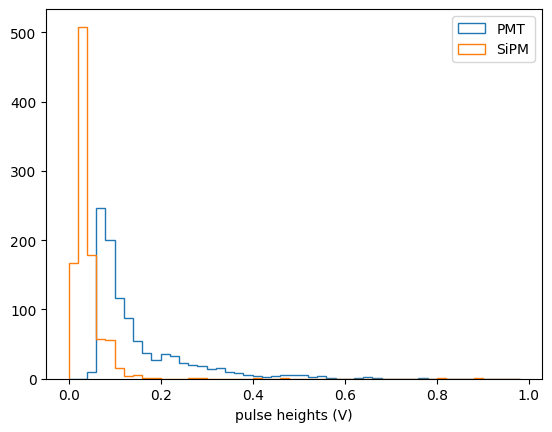

33

In [25]:
filepath = "./data/24-03-13_run-012_innershield_Vthres-40mV_Ntrace-1000.npy"
data = np.load(filepath)
pulseheights1 = [np.max(d[0]) for d in data]
pulseheights2 = [np.max(d[1]) for d in data]
fig, ax = plt.subplots()
h = plt.hist(pulseheights1, histtype='step', bins=np.arange(0,1,0.02), label="PMT")
plt.hist(pulseheights2, histtype='step', bins=np.arange(0,1,0.02), label="SiPM")
plt.xlabel('pulse heights (V)')
plt.legend()
plt.show()
h[0][0]
np.count_nonzero(np.array(pulseheights2) > 0.1)

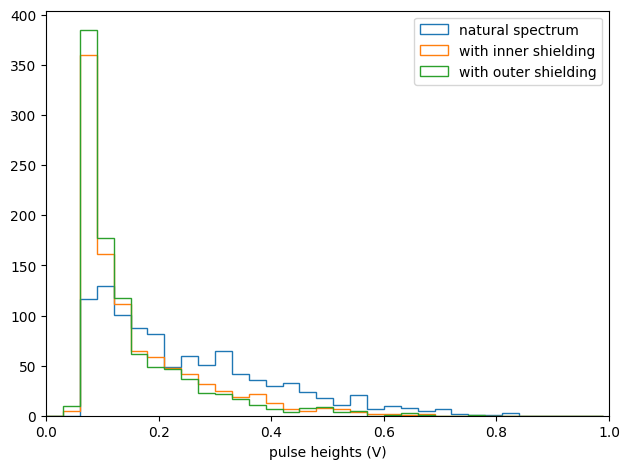

In [30]:
# Ru 106
# natural spectrum
filepath = "./data/24-03-13_run-015_innershield_Vthres-40mV_Ntrace-1000.npy"
data = np.load(filepath)
nat = [np.max(d[0]) for d in data]
# with inner shielding
filepath = "./data/24-03-13_run-009_innershield_Vthres-40mV_Ntrace-1000.npy"
data = np.load(filepath)
inner = [np.max(d[0]) for d in data]
# with outer shielding
filepath = "./data/24-03-13_run-012_innershield_Vthres-40mV_Ntrace-1000.npy"
data = np.load(filepath)
outer = [np.max(d[0]) for d in data]

fig, ax = plt.subplots()
h = plt.hist(nat, histtype='step', bins=np.arange(0,1,0.03), label="natural spectrum")
h = plt.hist(inner, histtype='step', bins=np.arange(0,1,0.03), label="with inner shielding")
h = plt.hist(outer, histtype='step', bins=np.arange(0,1,0.03), label="with outer shielding")
plt.xlabel('pulse heights (V)')
plt.xlim(0,1)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('./fig/Ru106_comparison.png')